# ECG Signal Classification - Data Loading & Exploration

This notebook focuses on:
- Loading the ECG dataset
- Visualizing raw ECG signals
- Understanding class distribution

In [1]:
import numpy as np
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt

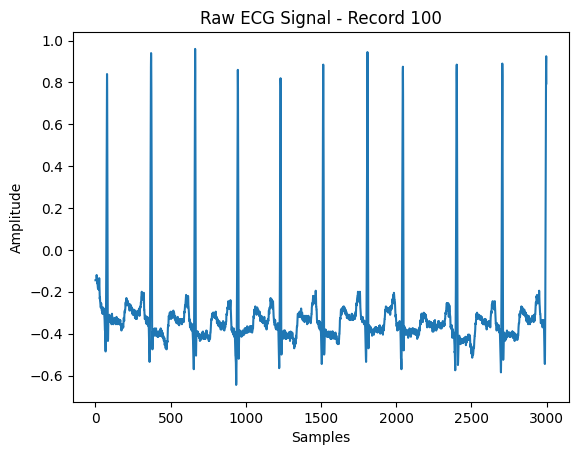

In [2]:
# Loaading the data
record=wfdb.rdrecord('../data/raw/mit-bih-arrhythmia-database-1.0.0/100') 

print(record)

signal=record.p_signal[: ,0]  # Extracting the ECG signal (first channel)

# Plotting the signal
plt.figure()
plt.plot(signal[:3000])
plt.title("Raw ECG Signal - Record 100")
plt.ylabel("Amplitude")
plt.xlabel("Samples")
plt.show()

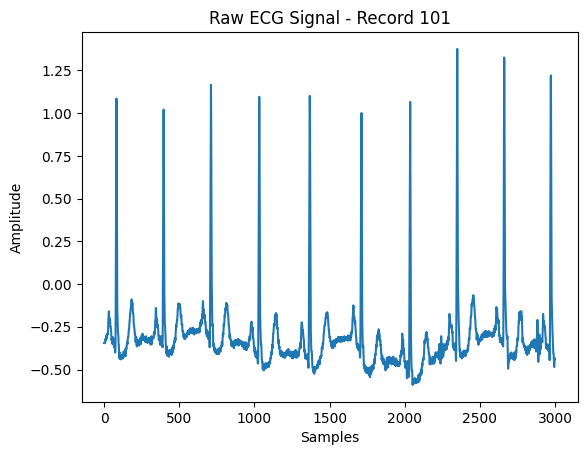

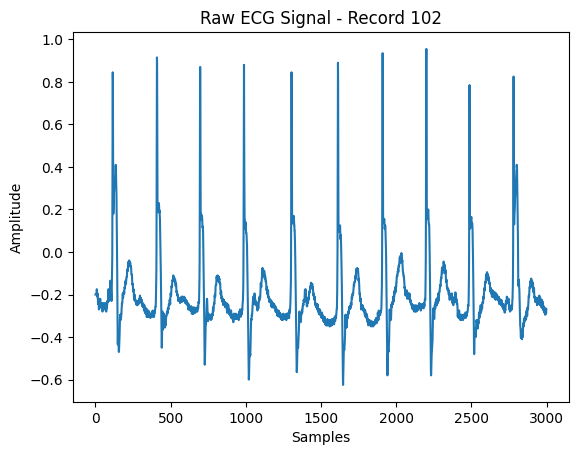

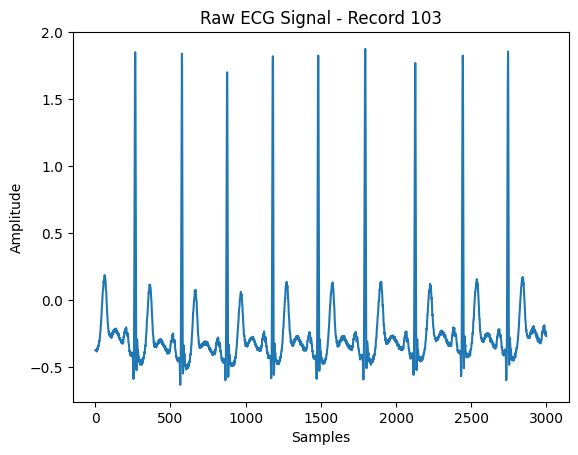

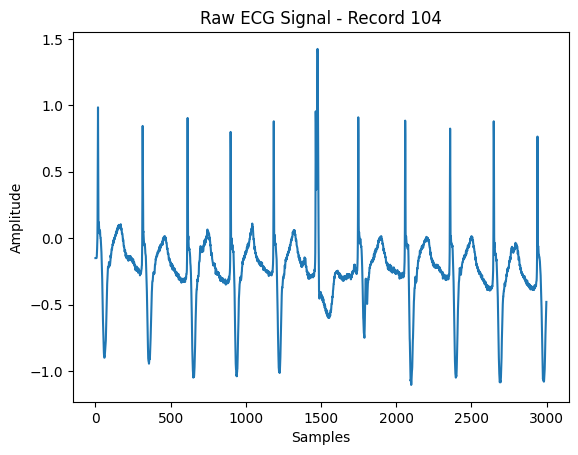

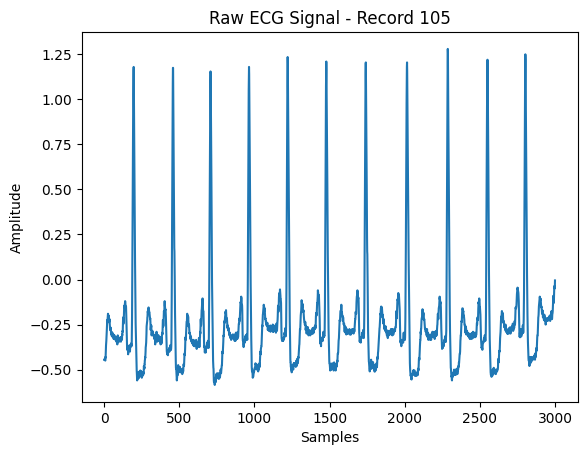

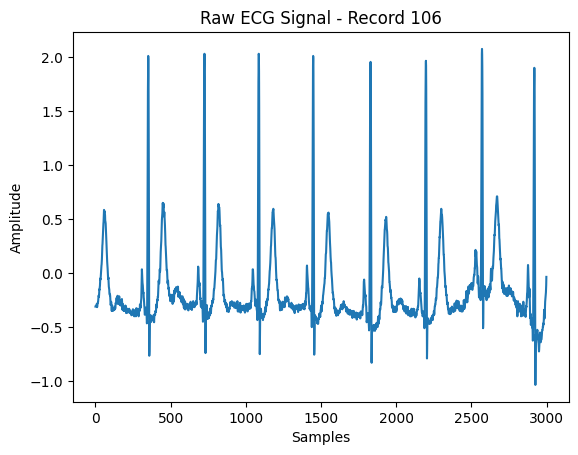

In [3]:
records=["101","102","103","104","105","106"]
for r in records:
    record=wfdb.rdrecord(f'../data/raw/mit-bih-arrhythmia-database-1.0.0/{r}')
    signal=record.p_signal[:,0]
    plt.figure()
    plt.plot(signal[:3000])
    plt.title(f"Raw ECG Signal - Record {r}")
    plt.ylabel("Amplitude")
    plt.xlabel("Samples")
    plt.show()

In [4]:
record=wfdb.rdrecord("../data/raw/mit-bih-arrhythmia-database-1.0.0/100")

signal=record.p_signal

print("Signal shape: ", signal.shape)
print("Sampling frequency: ", record.fs)
print("Signal duration (seconds): ", signal.shape[0] / record.fs)
print("Number of leads: ", signal.shape[1])



Signal shape:  (650000, 2)
Sampling frequency:  360
Signal duration (seconds):  1805.5555555555557
Number of leads:  2


## Visualizing Full ECG vs Zoomed ECG

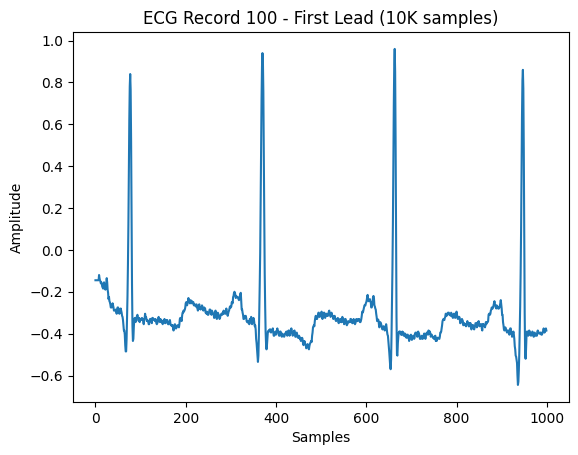

In [5]:
# Full signal (10K samples)
plt.figure()
plt.plot(signal[:1000, 0])
plt.title("ECG Record 100 - First Lead (10K samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

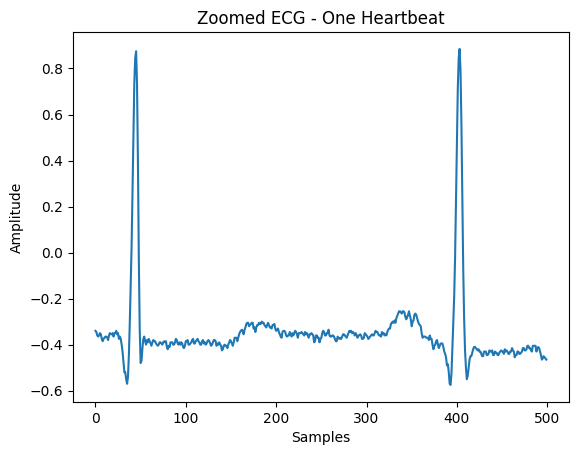

In [7]:
# Zoom into one heartbeat
plt.figure()
plt.plot(signal[2000:2500, 0])
plt.title("Zoomed ECG - One Heartbeat")
plt.xlabel("Samples")
plt.ylabel("Amplitude") 
plt.show()

## Visualize ECG annotations

In [11]:
annotation = wfdb.rdann("../data/raw/mit-bih-arrhythmia-database-1.0.0/100", "atr")

print("Total beats: ", len(annotation.sample))
print("Unique beat labels: ", set(annotation.symbol))


Total beats:  2274
Unique beat labels:  {'N', 'A', 'V', '+'}


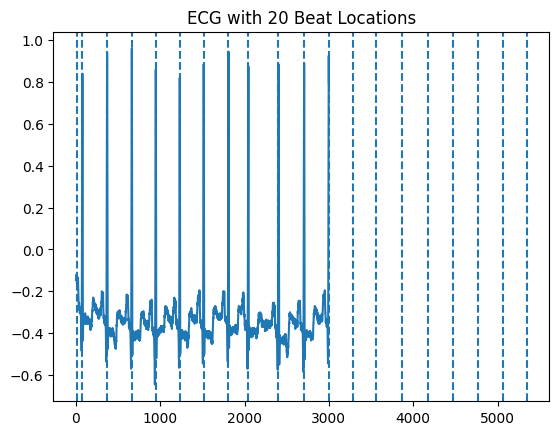

In [12]:
## Visualie ECG with Beat Markers

plt.figure()
plt.plot(signal[:3000, 0])

beat_positions=annotation.sample[:20]

for b in beat_positions:
    plt.axvline(b, linestyle='--')

plt.title("ECG with 20 Beat Locations")
plt.show()


In [13]:
# Count Different Heartbeat Types
from collections import Counter

beat_counts = Counter(annotation.symbol)
beat_counts

Counter({'N': 2239, 'A': 33, '+': 1, 'V': 1})

In [ ]:
import numpy as np

beats = []
heart_sample_length = 200  # Total length after sampling (100 before + 100 after)

for b in annotation.sample:
    start = b - 100
    end = b + 100

    if 0 <= start < len(signal) and 0 < end <= len(signal):
        beats.append(signal[start:end, 0])
    else:
        continue  # Skip if the slice is out of bounds

# Convert to a NumPy array
beats = np.array(beats)

print("Heartbeat samples shape:", beats.shape)

Heartbeat samples shape: (2271, 200)


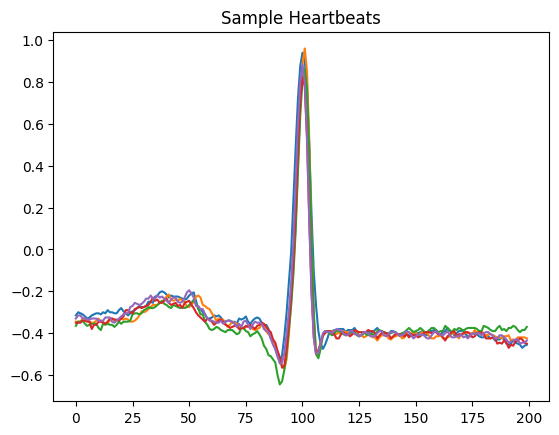

In [19]:
plt.figure()
for i in range(5):
    plt.plot(beats[i])
plt.title("Sample Heartbeats")
plt.show()
